# 3번 컨볼루션 신경망 구현

(1) INPUT-CONV(32,3x3)-CONV(32,3x3)-RELU-POOL-CONV(32,3x3)-CONV(32,3x3)-RELU-POOL-FC-OUTPUT

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):  # nn.Module은 층과 전방전파(입력->출력)을 쉽게 구현
    def __init__(self):
        super(Net, self).__init__()
        
        # 3 input image channel, 32 ouput channels, 3x3 square convolution
        # kernel  컨볼루션층
        self.conv1 = nn.Conv2d(3,32,3)
        self.conv2 = nn.Conv2d(32,32,3)
        self.conv3 = nn.Conv2d(32,32,3)
        self.conv4 = nn.Conv2d(32,32,3)
        self.pool = nn.MaxPool2d(2, 2)
        # an affine operation y = Wx+b   FC층(fully-connected)
        self.fc1 = nn.Linear(32*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        

    def forward(self,x):   
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(-1, 32*5*5)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# 훈련집합의 일부사진들 확인
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#functions to show image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [8]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

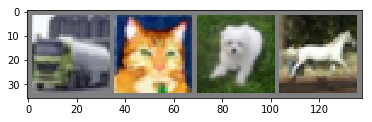

In [9]:
# show images
imshow(torchvision.utils.make_grid(images))

In [10]:
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

truck   cat   dog horse


#2. 컨볼루션 신경망을 정의함

In [11]:
import torch.optim as optim

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

(3) 화면 출력 확인

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
print('Finished Training')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  1000] loss: 2.300
[1,  2000] loss: 2.180
[1,  3000] loss: 2.002
[1,  4000] loss: 1.848
[1,  5000] loss: 1.751
[1,  6000] loss: 1.671
[1,  7000] loss: 1.591
[1,  8000] loss: 1.533
[1,  9000] loss: 1.511
[1, 10000] loss: 1.450
[1, 11000] loss: 1.417
[1, 12000] loss: 1.347
[2,  1000] loss: 1.303
[2,  2000] loss: 1.274
[2,  3000] loss: 1.288
[2,  4000] loss: 1.236
[2,  5000] loss: 1.177
[2,  6000] loss: 1.130
[2,  7000] loss: 1.151
[2,  8000] loss: 1.142
[2,  9000] loss: 1.121
[2, 10000] loss: 1.086
[2, 11000] loss: 1.072
[2, 12000] loss: 1.071
Finished Training


In [14]:
#performance on the whole test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


In [15]:
#performance on each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 74 %
Accuracy of   car : 73 %
Accuracy of  bird : 41 %
Accuracy of   cat : 25 %
Accuracy of  deer : 57 %
Accuracy of   dog : 70 %
Accuracy of  frog : 71 %
Accuracy of horse : 75 %
Accuracy of  ship : 71 %
Accuracy of truck : 80 %
